In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

given     linear coeff a=0.500, b=2.000
estimated linear coeff a=0.493, b=1.981 (scipy.stats.linregress)
estimated linear coeff a=0.493, b=1.981


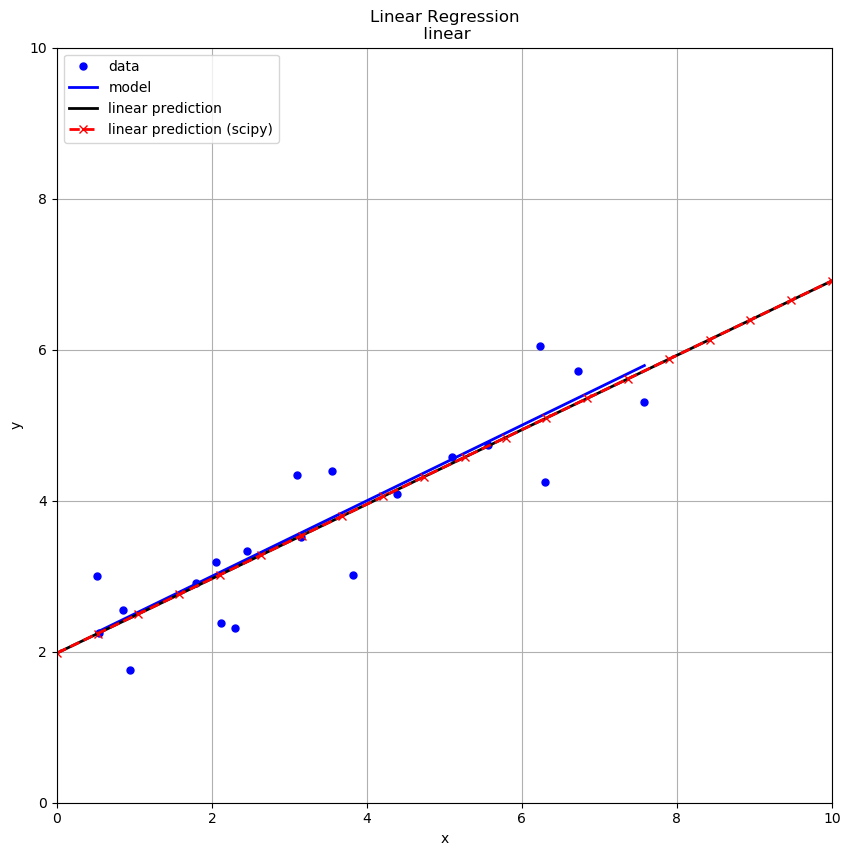

In [2]:
# linear 
L = 10
H = 10 
nx = 20
x_pred = np.cumsum(np.random.rand(nx)*2*L/nx)

a = 0.5
b = 2.0
y_mod = a*x_pred+b
y_resp =  y_mod+(np.random.rand(nx)-0.5)*2.0

slope, intercept, r_value, p_value, std_err = stats.linregress(x_pred,y_resp)

X = np.zeros([nx,2],float)
X[:,0] = 1
X[:,1] = x_pred[:]

X = np.matrix(X)

beta = np.linalg.inv(X.T*X)*X.T *np.array([y_resp]).T
beta = np.array(beta).flatten()

x_test = np.linspace(0,L,nx)
y_test = beta[0] +beta[1]*x_test

y_test_scipy = intercept + slope*x_test

print("given     linear coeff a={:2.3f}, b={:2.3f}".format(a,b))
print("estimated linear coeff a={:2.3f}, b={:2.3f} (scipy.stats.linregress)".format(slope,intercept))
print("estimated linear coeff a={:2.3f}, b={:2.3f}".format(beta[1],beta[0]))

fig=plt.figure(figsize=(10,10), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.plot(x_pred,y_resp,'ob',label='data',markersize=5)
ax.plot(x_pred,y_mod,'-b',lw=2,label='model')
ax.plot(x_test,y_test,'-k',lw=2,label='linear prediction')
ax.plot(x_test,y_test_scipy,'x--r',lw=2,label='linear prediction (scipy)')

plt.xlim([0,L])
plt.ylim([0,H])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression\n linear')
plt.legend(loc='upper left')
plt.savefig('linear_regression_linear.png',dpi=200,format='png')
plt.show()

given     quadratic coeff a=0.100, b=-0.500, c=2.000
estimated quadratic coeff a=0.101, b=-0.533, c=2.362


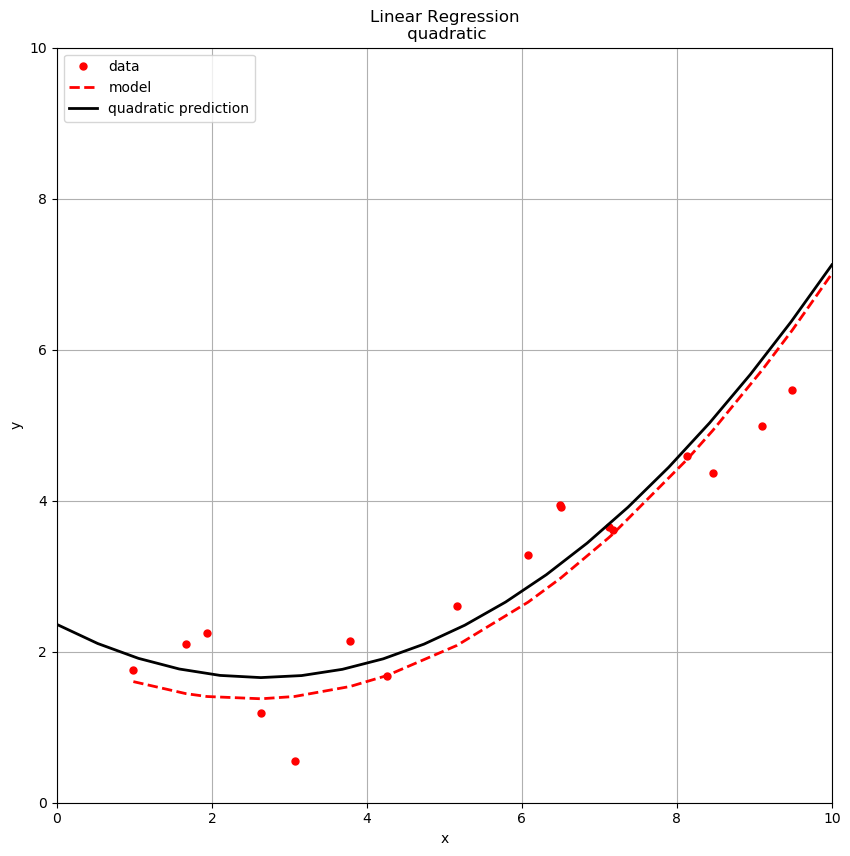

In [3]:
# quadratic 
L = 10
H = 10 
nx = 20
x_pred = np.cumsum(np.random.rand(nx)*2*L/nx)

a = 0.1
b = -0.5
c = 2.0
y_mod = a*x_pred**2+b*x_pred+c
y_resp =  y_mod+(np.random.rand(nx)-0.5)*2.0

X = np.zeros([nx,3],float)
X[:,0] = 1
X[:,1] = x_pred[:]
X[:,2] = x_pred[:]**2

X = np.matrix(X)

beta = np.linalg.inv(X.T*X)*X.T *np.array([y_resp]).T
beta = np.array(beta).flatten()

x_test = np.linspace(0,L,nx)
y_test = beta[2]*x_test**2+beta[1]*x_test + beta[0]

print("given     quadratic coeff a={:2.3f}, b={:2.3f}, c={:2.3f}".format(a,b,c))
print("estimated quadratic coeff a={:2.3f}, b={:2.3f}, c={:2.3f}".format(beta[2],beta[1],beta[0]))

fig=plt.figure(figsize=(10,10), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.plot(x_pred,y_resp,'or',label='data',markersize=5)
ax.plot(x_pred,y_mod,'--r',lw=2,label='model')
ax.plot(x_test,y_test,'-k',lw=2,label='quadratic prediction')


plt.xlim([0,L])
plt.ylim([0,H])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression\n quadratic')
plt.legend(loc='upper left')
plt.savefig('linear_regression_quadratic.png',dpi=200,format='png')
plt.show()


given     harmonic coeff a=0.500, b=0.500, c=0.000
estimated harmonic coeff a=0.432, b=0.441, c=0.020


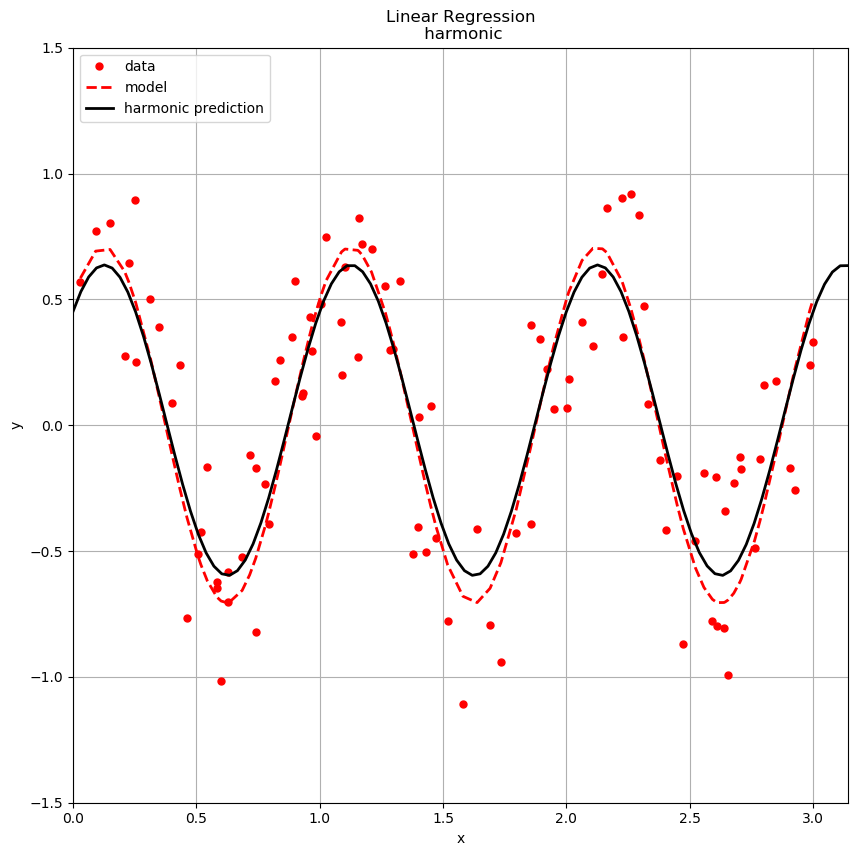

In [4]:
## harmonic 
L = 1*np.pi
H = 1.5 
nx = 100
x_pred = np.cumsum(np.random.rand(nx)*2*L/nx)

a = 0.5
b = 0.5
c = 0.0
y_mod = a*np.sin(2*np.pi*x_pred)+b*np.cos(2*np.pi*x_pred)+c
y_resp =  y_mod+(np.random.rand(nx)-0.5)*1.0

X = np.zeros([nx,3],float)
X[:,0] = 1
X[:,1] = np.sin(2*np.pi*x_pred[:])
X[:,2] = np.cos(2*np.pi*x_pred[:])

X = np.matrix(X)

beta = np.linalg.inv(X.T*X)*X.T *np.array([y_resp]).T
beta = np.array(beta).flatten()

x_test = np.linspace(0,L,nx)
y_test = beta[1]*np.sin(2*np.pi*x_test)+beta[2]*np.cos(2*np.pi*x_test) + beta[0]

print("given     harmonic coeff a={:2.3f}, b={:2.3f}, c={:2.3f}".format(a,b,c))
print("estimated harmonic coeff a={:2.3f}, b={:2.3f}, c={:2.3f}".format(beta[2],beta[1],beta[0]))

fig=plt.figure(figsize=(10,10), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.plot(x_pred,y_resp,'or',label='data',markersize=5)
ax.plot(x_pred,y_mod,'--r',lw=2,label='model')
ax.plot(x_test,y_test,'-k',lw=2,label='harmonic prediction')


plt.xlim([0,L])
plt.ylim([-H,H])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression\n harmonic')
plt.legend(loc='upper left')
plt.savefig('linear_regression_harmonic.png',dpi=200,format='png')
plt.show()